<a href="https://colab.research.google.com/github/Satishkumarsingh2019/gpt-2/blob/master/Share_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Stock price rediction based on the last 60days value using the LSTM (Long Short Term Memory)

In [ ]:
#https://www.youtube.com/watch?v=QIUxPv5PJOY&t=327s&ab_channel=ComputerScience

In [16]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from datetime import datetime, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [75]:
#Get stock quote

# Set the end date to today
#end_date = datetime.now()
end_date = datetime(2023,12,1)

# Set the start date to 60 days ago
#start_date = end_date - timedelta(days=60)
start_date = datetime(2022,12,1)

# Ticker symbol for Apple Inc.
ticker_symbol = 'AAPL'

# Fetch stock data from Yahoo Finance
#df = web.DataReader(ticker_symbol, data_source='yahoo', start=start_date, end=end_date)

 # Fetch stock data from Yahoo Finance using yfinance
df = yf.download(ticker_symbol, start=start_date, end=end_date)


#show the data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-01,148.210007,149.130005,146.610001,148.309998,147.485626,71250400
2022-12-02,145.960007,148.000000,145.649994,147.809998,146.988419,65447400
2022-12-05,147.770004,150.919998,145.770004,146.630005,145.814972,68826400
2022-12-06,147.070007,147.300003,141.919998,142.910004,142.115646,64727200
2022-12-07,142.190002,143.369995,140.000000,140.940002,140.156601,69721100
...,...,...,...,...,...,...
2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300
2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600
2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400


In [76]:
# get number of rows and columns in the dataser
df.shape

(251, 6)

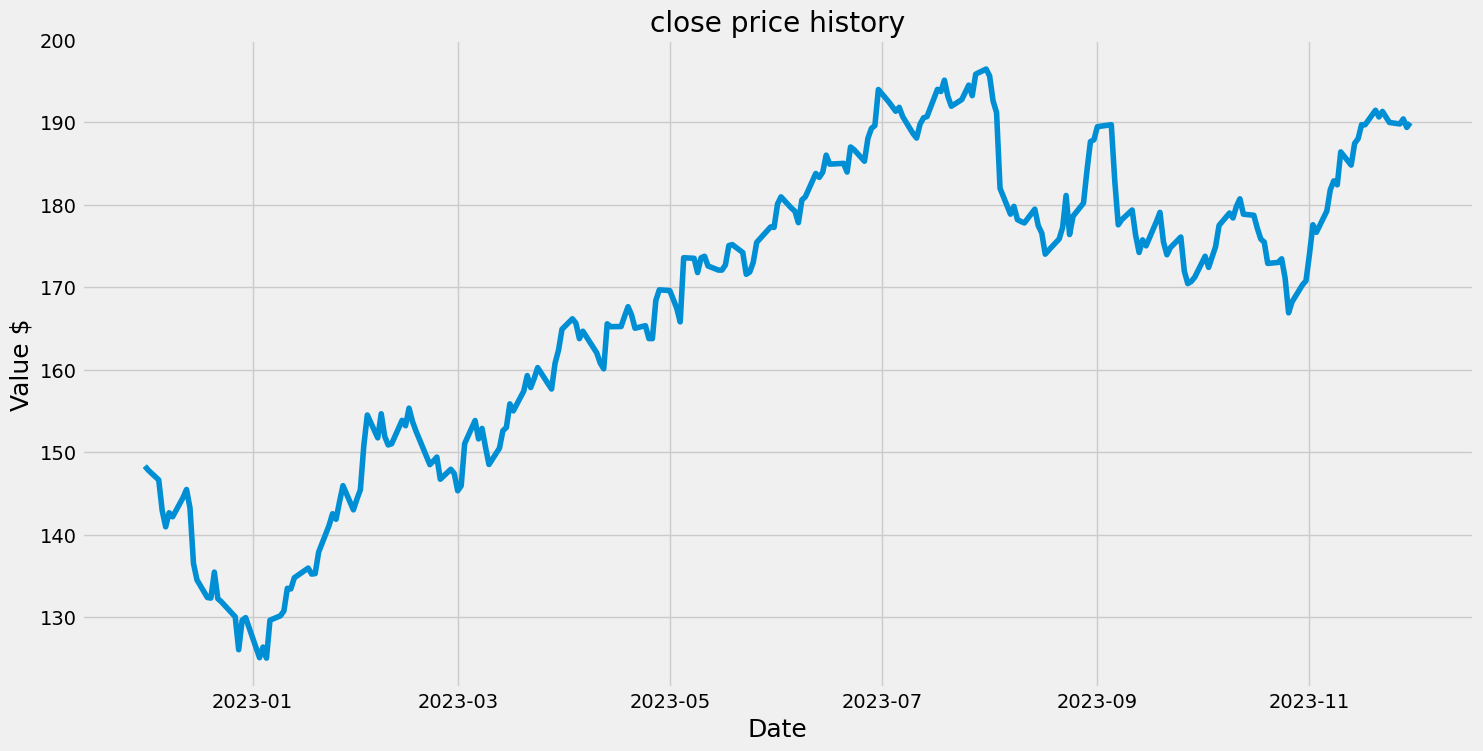

In [77]:
#visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('close price history')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Value $',fontsize=18)
plt.show()

In [78]:
#Create a new data frame with only the 'Close Column'
data = df.filter(['Close'])
#Convert the dataframe to numpy array
dataset = data.values
#Get the number of rows to train the model on only the 80% of the data set
training_data_len = math.ceil(len(dataset)*.8)

training_data_len

201

In [82]:
#Scale the data , advantageous to have scaling or normalization before presenting it to neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data
# scaled_data.shape (40, 1)
scaled_data.shape

(251, 1)

In [83]:
#Create the training dataset
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
# Split the data into the x_train and y_train data sets , x independent list and y dependent/target list
x_train =[]
y_train = []

# create a loop for i in range 32 for a lenthe of training_data
for i in range (30, len(train_data)):
  x_train.append(train_data[i-30:i, 0])
  y_train.append(train_data[i, 0])
  if i<=30:
    print(x_train)
    print(y_train)
    print()


[array([0.32605349, 0.31905363, 0.30253406, 0.25045509, 0.22287562,
       0.24681502, 0.2399553 , 0.27257467, 0.28629434, 0.25465505,
       0.16071683, 0.13285731, 0.10289792, 0.10191805, 0.14601708,
       0.10093797, 0.09575814, 0.07013863, 0.01427977, 0.06425877,
       0.06873857, 0.00070003, 0.01875968, 0.        , 0.06439869,
       0.07181852, 0.07993839, 0.11857775, 0.11745775, 0.13635724])]
[0.1528770229831371]



In [84]:
#Convert x_train and y_train to numpy arrays , to be used for traing the LSTM mode
x_train, y_train = np.array(x_train), np.array(y_train)

In [85]:
#reshape the x_train data set, as the LSTM expects a 3D input data , sample , features
x_train = np.reshape(x_train, ( x_train.shape[0], x_train.shape[1],1))
x_train.shape

(171, 30, 1)

In [86]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(30, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(30,return_sequences = False))
model.add(Dense(15))
model.add(Dense(1))

In [87]:
#Compile the model based on the loss fucntion
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [88]:
# train the model
model.fit(x_train, y_train, batch_size=1,epochs=1)

171/171 [==============================] - 7s 16ms/step - loss: 0.0193


In [89]:
#Create the testing dataset
#Create a new array containg scaled values from index 17 to 100
test_data = scaled_data[training_data_len - 30: , :]
#Create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(30, len(test_data)):
  x_test.append(test_data[i-30:i,0])


In [90]:
#convert the data into a numpy array
x_test = np.array(x_test)

In [91]:
#reshape the data to use it in LSTM model
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [92]:
#Get the models predicted price values for x_testdata set
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

2/2 [==============================] - 1s 11ms/step


In [93]:
#Get the root mean square error  (RMSE) , to validate the model accurancy lower RMSE is better
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

0.99052490234375

<ipython-input-94-80ee5da2f3fe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


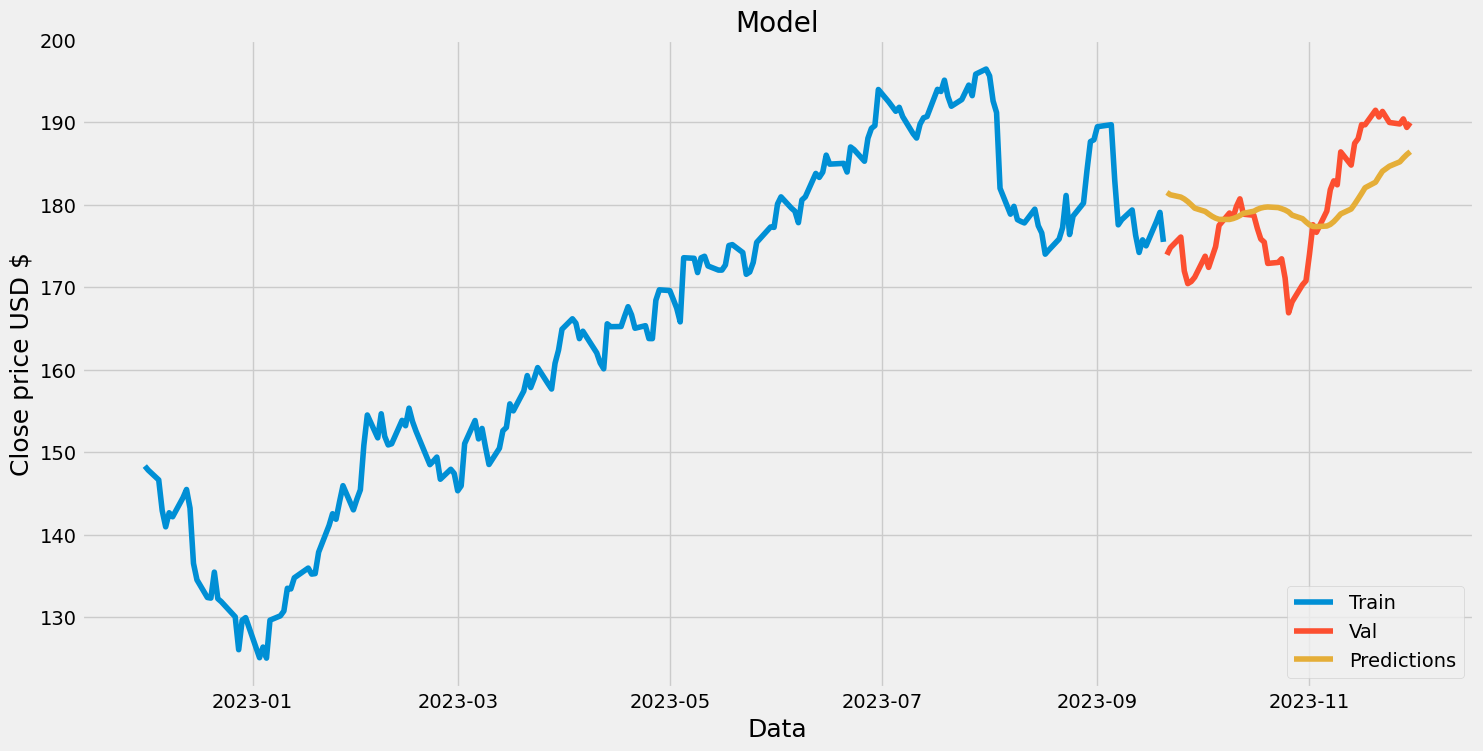

In [94]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize =(16,8))
plt.title('Model')
plt.xlabel('Data',fontsize=18)
plt.ylabel('Close price USD $',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc = 'lower right')
plt.show()

In [95]:
#show the valid and actual price and the predicted price
#2024-01-03	184.250000	190.423157
valid

,Close,Predictions
Date,,
2023-09-21,173.929993,181.482330
2023-09-22,174.789993,181.202316
2023-09-25,176.080002,180.923889
2023-09-26,171.960007,180.689499
2023-09-27,170.429993,180.374283
2023-09-28,170.690002,179.987671
2023-09-29,171.210007,179.577438
2023-10-02,173.750000,179.182419
2023-10-03,172.399994,178.875549


In [ ]:
#predict the price in the future
#get the quote
apple_quote =